In [1]:
import numpy as np
import pandas as pd
import flask
# from flask import Flask, flash, request, redirect, url_for
from statsmodels.tsa.api import ExponentialSmoothing
import requests

In [164]:
import os
os.environ['NO_PROXY'] = '127.0.0.1'

In [2]:
url='127.0.0.1:5001'
r=requests.get(f'http://{url}')

In [45]:
data.dtype

dtype('float64')

In [72]:
response=requests.post(f'http://{url}/predict', json=df.to_dict())
res = json.loads(response.content)

In [77]:
import json

In [84]:
pd.Series(res)

52    29.411374
53    20.668839
54    34.635358
55    36.663384
56    29.296429
57    20.596242
58    34.589507
59    36.634426
60    29.278140
61    20.584691
dtype: float64

In [18]:
def get_data(df):

    data = df[df.city=='sj'].iloc[:,1:].station_precip_mm
    data.index = pd.DatetimeIndex(df[df.city=='sj'].iloc[:,1:].week_start_date)

    return data

def get_model(data):

    fit = ExponentialSmoothing(data.tail(52), trend='add', 
                         damped=True, seasonal='add', 
                         seasonal_periods=4).fit()
    return fit


In [19]:
data = get_data(df)
model = get_model(data)

/home/ryeyoo/anaconda3/envs/keras/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [22]:
data.tail(52)

week_start_date
2012-04-29    17.5
2012-05-06    20.6
2012-05-13    72.0
2012-05-20    17.8
2012-05-27    34.6
2012-06-03     6.4
2012-06-10     3.6
2012-06-17     0.0
2012-06-24     0.6
2012-07-01     3.1
2012-07-08    11.0
2012-07-15    52.0
2012-07-22    13.2
2012-07-29    49.4
2012-08-05     8.7
2012-08-12    50.1
2012-08-19    69.6
2012-08-26    26.9
2012-09-02    80.2
2012-09-09     3.1
2012-09-16     0.0
2012-09-23     5.6
2012-09-30     5.4
2012-10-07    42.6
2012-10-14    17.3
2012-10-21    32.5
2012-10-28    49.8
2012-11-04    19.3
2012-11-11     1.5
2012-11-18     3.1
2012-11-25    14.2
2012-12-02    46.6
2012-12-09    58.9
2012-12-16     9.8
2012-12-23    26.4
2013-01-01    22.7
2013-01-08     8.7
2013-01-15    17.2
2013-01-22     6.4
2013-01-29     6.1
2013-02-05    26.4
2013-02-12    34.8
2013-02-19     0.3
2013-02-26     4.1
2013-03-05     6.6
2013-03-12    17.1
2013-03-19     4.8
2013-03-26     3.5
2013-04-02    17.6
2013-04-09     9.4
2013-04-16    22.9
2013-04-23    4

In [20]:
result = model.forecast(10)

/home/ryeyoo/anaconda3/envs/keras/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [21]:
result

52    17.353683
53    15.805004
54    17.680844
55    14.199086
56    17.462574
57    15.879508
58    17.731821
59    14.233965
60    17.486438
61    15.895836
dtype: float64

In [123]:
app = flask.Flask(__name__)
data = None
model = None

In [133]:
@app.route("/predict", methods=["POST"])
def predict():
    # initialize the data dictionary that will be returned from the
    # view
    data = {"success": False}

    # ensure an image was properly uploaded to our endpoint
    if flask.request.method == "POST":
        
        preds = model.forecast(20)
        
        data["predictions"] = preds

        data["success"] = True

    # return the data dictionary as a JSON response
    return flask.jsonify(data)

In [97]:
res = pd.to_datetime(df[df.city=='sj'].iloc[:,1:].week_start_date, infer_datetime_format=True, yearfirst=True)

In [10]:
def proc_data():

    df = pd.read_csv('../../data/input/dengue_features_test.csv')
    data = df[df.city=='sj'].iloc[:,1:].station_precip_mm
    data.index = pd.DatetimeIndex(df[df.city=='sj'].iloc[:,1:].week_start_date)

    return data

def get_model():
    fit = ExponentialSmoothing(data.tail(52), trend='add', 
                         damped=True, seasonal='add', 
                         seasonal_periods=4).fit()
    return fit

In [14]:
df = pd.read_csv('../../data/input/dengue_features_test.csv')

In [11]:
data = proc_data()
res = get_model()

/home/ryeyoo/anaconda3/envs/keras/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [13]:
res.forecast(20).to_dict()

/home/ryeyoo/anaconda3/envs/keras/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


{52: 17.35368309025058,
 53: 15.805003614857075,
 54: 17.680844199956557,
 55: 14.199086266716122,
 56: 17.462574193471543,
 57: 15.879507769265071,
 58: 17.731820531905242,
 59: 14.233964676377848,
 60: 17.48643827733218,
 61: 15.895835764263435,
 62: 17.74299227527589,
 63: 14.241608471586758,
 64: 17.491668222494475,
 65: 15.89941413412462,
 66: 17.745440624248214,
 67: 14.243283651325811,
 68: 17.49281439372654,
 69: 15.900198353550504,
 70: 17.74597719338442,
 71: 14.243650776174324}

In [193]:
response.content

b'{"54": NaN, "55": NaN, "56": NaN, "57": NaN, "58": NaN, "59": NaN, "60": NaN, "61": NaN, "62": NaN, "63": NaN}'

/home/ryeyoo/anaconda3/envs/keras/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


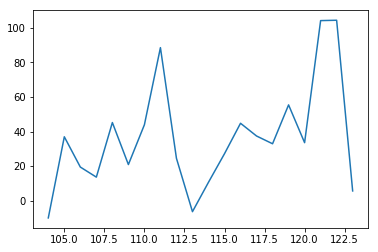

In [117]:
fit.forecast(20).plot()